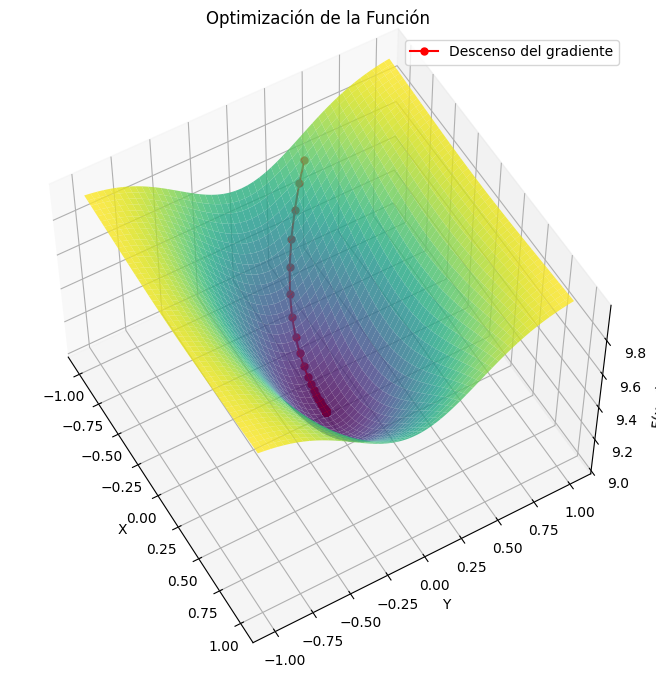

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Definición de la función
def objective_function(x, y):
    return 10 - np.exp(-(x**2 + 3*y**2))

#Derivadas de la función
def deriv_X(x, y):
    return 2 * x * np.exp(-x**2 - 3 * y**2)

def deriv_Y(x, y):
    return 6 * y * np.exp(-x**2 - 3 * y**2)

# Algoritmo de descenso del gradiente
def gradient_descent(objective, deriv_X, deriv_Y, limitation, iterations, learning_rate):
    # Listas para rastrear soluciones y puntajes
    solutions_x, solutions_y, scores = [], [], []

    # Generar un punto inicial aleatorio dentro de los límites
    initial_point = limitation[:, 0] + np.random.rand(2) * (limitation[:, 1] - limitation[:, 0])
    x, y = initial_point

    # Ejecutar el descenso de gradiente
    for i in range(iterations):
        # Calcular las derivadas parciales en el punto actual
        gradient_x = deriv_X(x, y)
        gradient_y = deriv_Y(x, y)

        # Actualizar los valores de x e y utilizando el descenso del gradiente
        x -= learning_rate * gradient_x
        y -= learning_rate * gradient_y

        # Evaluar el punto candidato en la función objetivo
        score = objective(x, y)

        # Almacenar la solución y el puntaje
        solutions_x.append(x)
        solutions_y.append(y)
        scores.append(score)

    return solutions_x, solutions_y, scores

def graph(sol_X, sol_Y, scores):
    # Crear una malla para la superficie tridimensional
    x_values = np.linspace(-1, 1, 400)
    y_values = np.linspace(-1, 1, 400)
    X, Y = np.meshgrid(x_values, y_values)
    Z = objective_function(X, Y) # Calcular los valores Z basados en la función objetivo

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('F(x, y)')
    ax.set_title('Optimización de la Función')
    ax.view_init(elev=55, azim=-30)

    ax.plot(sol_X, sol_Y, scores, marker='o', linestyle='-', color='red', markersize=5, label='Descenso del gradiente')

    ax.legend()

    plt.show()

# Parámetros iniciales
limitation = np.array([[-1.0, 1.0], [-1.0, 1.0]])
learning_rate = 0.1
iterations = 100

# Optimización usando descenso del gradiente
solutions_x, solutions_y, scores = gradient_descent(objective_function, deriv_X, deriv_Y, limitation, iterations, learning_rate)

# Visualización
graph(solutions_x, solutions_y, scores)
